In [20]:
# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First of all, we generate data which we will impute. Then, we change certain observations to contain missing values. Finally, we visualize the complete observations.

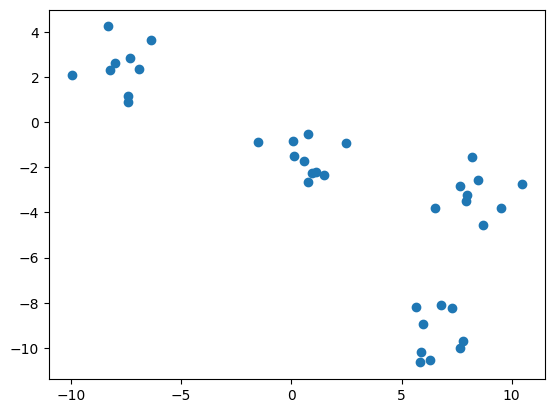

In [21]:
from sklearn.datasets import make_blobs
X, cluster = make_blobs(n_samples=45, centers=4, n_features=2, random_state=6)

X_miss = X.copy()
X_miss[[0,1,5,6],0] = np.nan
X_miss[[40,41,43,44],1] = np.nan

plt.scatter(X_miss[:, 0], X_miss[:, 1])
plt.show()

In this exercise, we will fit data models and impute missing entries in data, using the following functions:

*  Sum of squares implausibility function: $l^1_θ(x)=‖x-θ‖^2_2$
*  k-means implausibility function, with $k=4$:  $l^2_\theta(x)=min_{j = 1, \dots,4}‖x−θ_j‖^2_2$

Implausibility functions, models and the way how to determine parameters $θ$ and $θ_j$ are described in [unsupervised learning slides](https://vzdelavanie.uniza.sk/moodle/pluginfile.php/290779/mod_resource/content/1/13.%20Unsupervised_learning.pdf) pg. 19-29. To knwo how to perform k-means you can check [sklearn manual](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

We start with of minimization $l^1_{\theta}$ over $\theta$. You can find the estimator in the slides.

To calculate the mean of an array containing missing values, you can use the `np.nanmean` function and `axis=0` to get means of columns.

So first, you need  estimate $\theta$ for both columns of the `X_miss` matrix.



In [22]:
theta = np.nanmean(X_miss, axis=0)
print(f"\u03b8 values: {theta}")

θ values: [ 1.95329884 -2.93627646]


Next, we identify missing values and use the `any` method to get which rows contain the `true` (missing) values.

In [23]:
missing_i = np.isnan(X_miss).any(axis=1)
X_miss[missing_i]

array([[         nan,  -2.12266605],
       [         nan,   1.30558157],
       [         nan,  -2.6476988 ],
       [         nan, -10.00047495],
       [  8.98426675,          nan],
       [ -7.40278343,          nan],
       [  6.5390239 ,          nan],
       [  0.54911019,          nan]])

To keep the original dataset untouched, we create a copy of it.

In [24]:
X_miss_imp = X_miss.copy()

We use the vector of missing indices to impute the values in the first column, with the corresponding element of $\theta$.

In [25]:

X_miss_imp[ np.isnan(X_miss_imp)[:,0],0] = theta[0]

Now, its your turn to impute missing values in the second column using the corresponding element of $\theta$.

In [26]:
X_miss_imp[ np.isnan(X_miss_imp)[:,1],1] = theta[1]

To see the imputations we performed, we plot the complete observations using blue and imputed values using red colors. The `~` symbol is used to negate the `missing_i` vector of booleans.

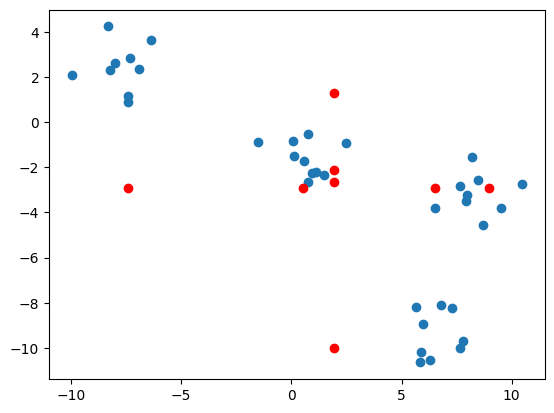

In [27]:
plt.scatter(X_miss_imp[~missing_i, 0], X_miss_imp[~missing_i, 1])
plt.scatter(X_miss_imp[missing_i, 0], X_miss_imp[missing_i, 1], color='red')
plt.show()

### More advanced imputations

As you can see, some of the imputed observations lie ouside the clusters of points. Can we do it better? Of course!
To get a more advanced imputation, we will use averages of groups of observations.
We determine $\theta_j$ (for $j = 1, \dots, 4 $) for implausibility function $l^2_{\theta}$ using matrix `X_miss` without the observations containing missing values. Please check the slides, on how to obtain the $\theta$ values.
1. Import the model from sklearn
2. Initiate the right unsupervised model.
3. Fit the model to the nonmissing data.
4. Extract the $\theta$ estimates from the fitted model.

In [28]:
# import the right model from sklearn
from sklearn.cluster import KMeans
# initialize the model with 4 thetas
model = KMeans(n_clusters=4)
# fit the model to the data
model.fit(X_miss[~missing_i,:])
# extract the theta parameters
thetas_4 = model.cluster_centers_
print(f"Centers:\n{thetas_4}")

Centers:
[[-7.77129616  2.45571705]
 [ 6.56892177 -9.39440238]
 [ 0.67881443 -1.5893607 ]
 [ 8.38320667 -3.1755891 ]]


In the next step, we visualize the complete observations and $\theta$ values, which correspond to the cluster centers.

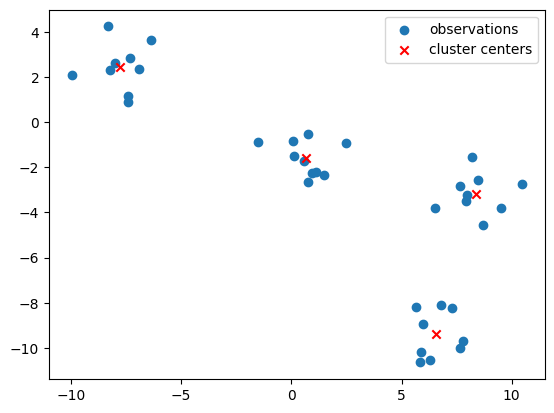

In [29]:
plt.scatter(X_miss[~missing_i, 0], X_miss[~missing_i, 1], label="observations")
plt.scatter(thetas_4[:, 0], thetas_4[:, 1], marker='x', color='red', label="cluster centers")
plt.legend()
plt.show()

Finally, we loop through observations containing missing values and replace the values with the coordinate of the closest point.
Code for one dimension is provided, for the second dimension you need to do the same process.

In [31]:
# copy the data
X_miss_imp_cl4 = X_miss.copy()

for i in np.where(missing_i)[0]:
  if np.isnan(X_miss[i, 0]):
    # returns closest point
    X_miss_imp_cl4[i, 0] = thetas_4[ np.argmin( np.abs(X_miss[i, 1] - thetas_4[:,1])), 0]
  elif np.isnan(X_miss[i, 1]):
    # returns closest point
    X_miss_imp_cl4[i, 1] = thetas_4[ np.argmin( np.abs(X_miss[i, 0] - thetas_4[:,0])), 1] # your turn

Finally, we plot the results. Please check, if all the values are within the corresponding clusters. If not, there is a chance, you have done some kind of mistake.

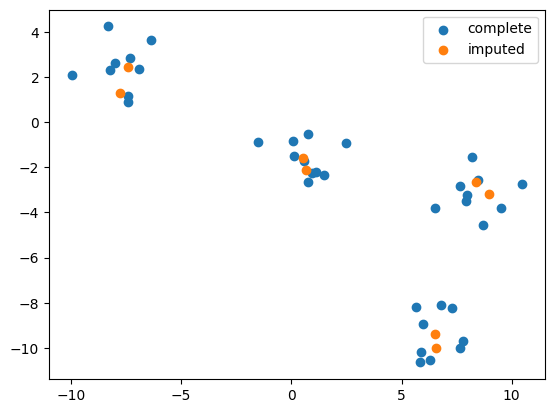

In [32]:
plt.scatter(X_miss_imp_cl4[~missing_i, 0], X_miss_imp_cl4[~missing_i, 1], label="complete")
plt.scatter(X_miss_imp_cl4[missing_i, 0], X_miss_imp_cl4[missing_i, 1], label="imputed")
plt.legend()
plt.show()

Finally, we compare the imputed and real points. The points are paired by one coordinate which was not missing and hence is equal for the pairs.

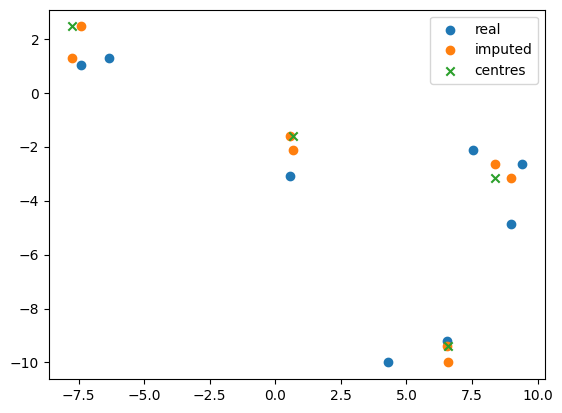

In [33]:
plt.scatter(X[missing_i, 0], X[missing_i, 1], marker="o", label="real")
plt.scatter(X_miss_imp_cl4[missing_i, 0], X_miss_imp_cl4[missing_i, 1], label="imputed")
plt.scatter(thetas_4[:, 0], thetas_4[:,1], marker="x", label="centres")
plt.legend()
plt.show()

Finally, to measures the error of imputation you need to apply the RMSE. To get the indices of just missing values use `np.isnan` and `X_miss`. The result should be around $2.7887$.

In [36]:
from sklearn.metrics import root_mean_squared_error
missing_indices = np.isnan(X_miss).any(axis=1)
RMSE = root_mean_squared_error(X_miss_imp_cl4[missing_indices], X[missing_indices])
print(f"RMSE: {RMSE:.4f}")

RMSE: 1.7839


#### An additional info about clustering
In the previous step, we assigned the clusters using the k-means algorithm.
Cluster assignments are in the `labels_` attribute. The cluster centers are in the `cluster_centers_` attribute. A performance measure of clustering - sum of squared distances of samples to their closest cluster center, also known as SSE, can be found in attribute `inertia_`. To see the result of the clustering which centres we were using, we can display the data coloured by the cluster labels.

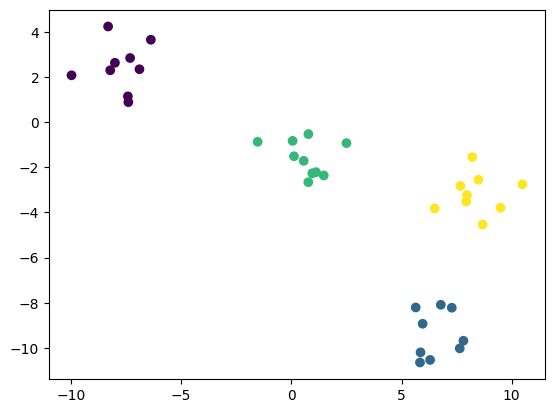

In [37]:
plt.scatter(X_miss_imp[~missing_i, 0], X_miss_imp[~missing_i, 1], c = model.labels_)